# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #4B94FF; text-align: center; line-height: 0.55;background-color: #000000"><b>Connecttel Customer Churn Prediction</b><br></h1>



<center>
    <img src="https://camo.githubusercontent.com/c098ac6a4a68b17721954455b480fd944339792580f7958bbd8a6f8d2dd83c6b/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f76322f726573697a653a6669743a3836302f302a7354482d334d505a56636961573364552e6a706567" alt="Connectell Customer Churn" width="100%">
</center>

### Problem Statement :

ConnectTel Telecom Company faces the challenge of customer churn, which threatens its sustainability and growth in the telecommunications industry. The current retention strategies lack effectiveness, resulting in lost customers to competitors. To address this, ConnectTel aims to develop a customer churn prediction system using advanced analytics and machine learning. By analyzing customer data, the company seeks to identify potential churn indicators early and implement targeted retention initiatives. This proactive approach will allow ConnectTel to optimize resource allocation, enhance customer loyalty, and maintain a competitive edge. Overall, the churn prediction system represents a strategic initiative to mitigate customer attrition and foster long-term success for ConnectTel in the telecommunications market.




In [1]:
# Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

In [3]:
df= pd.read_csv(r"C:\Users\erNEST.UDOUDO\Downloads\10alytics\10ALYTICS-PROJECT\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Reviewing the dataset for correctness


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
# Investigate any missing values
null_vals =df.isnull().sum()
null_vals

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

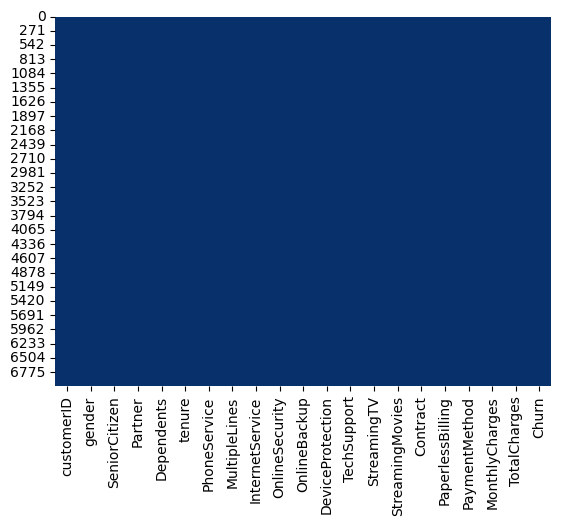

In [7]:
sns.heatmap(df.isnull(),cmap = "Blues_r",cbar = False);

From the above investigations, there are no missing values in the dataset.

In [8]:
df.columns # the data set has 21 columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Change TotalCharges object to float since Totalcharges are meant to be expressed as numeric variables
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
customerID  :  [5375 3962 2564 ... 3367 5934 2226]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mail

The above label encoder lib was imported to give a holistic copy view of the dataset
This deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [13]:
df1.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,3521.00,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,...,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2283.30,0.27
std,2033.28,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,...,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,1760.50,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.45,0.00
50%,3521.00,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,5281.50,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,...,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,7042.00,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


In [14]:
df["Churn"].value_counts()#counting the number of customers in the dataset who have churned: 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

This shows the summary of the churn customers: While 5174 is still with the company, about 1869 have already left.

# Exploratory Data Analysis for Conecttinel Customer Churn


# Univariate Analysis

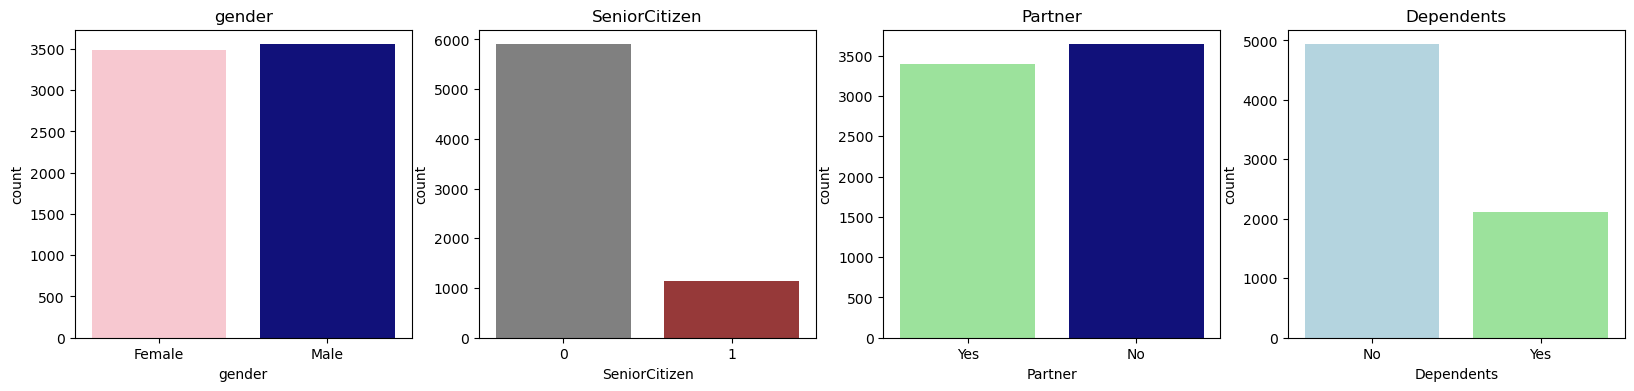

In [15]:
# Analyzing the dataset with respect to gender, SeniorCitizen, Partner and Dependents

# Define colors for each category
colors = {'gender': ['pink', 'Darkblue'],         # Assuming 'gender' has two categories
          'SeniorCitizen': ['gray', 'brown'], # Assuming 'SeniorCitizen' has two categories
          'Partner': ['Lightgreen', 'Darkblue'],      # Assuming 'Partner' has two categories
          'Dependents': ['Lightblue', 'Lightgreen']}  # Assuming 'Dependents' has two categories

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
numerical = cols

plt.figure(figsize=(20, 4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df, palette=colors[col])  # Use palette argument to specify colors
    ax.set_title(f"{col}")

plt.show()

Most customers in the dataset are younger individuals without a dependent. There is an equal distribution of user gender and marital status.

# Bivariate Analysis

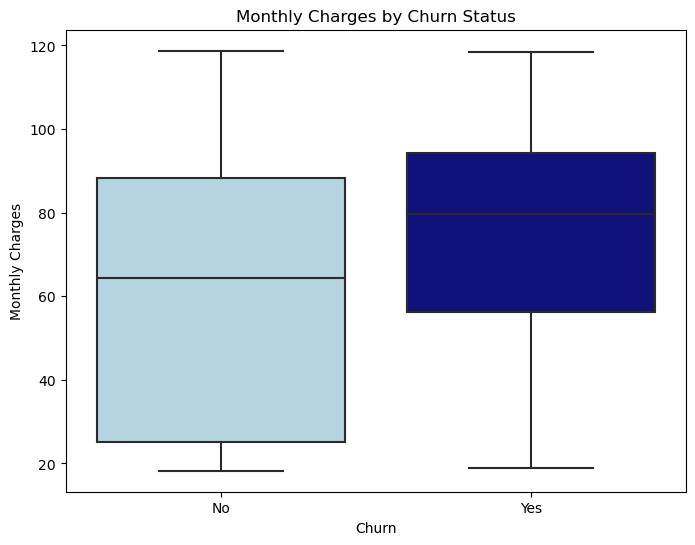

In [16]:
# Checking the relationship between Churn and monthlyCharges
plt.figure(figsize=(8, 6))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['Lightblue', 'darkblue'])

plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.show()


The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

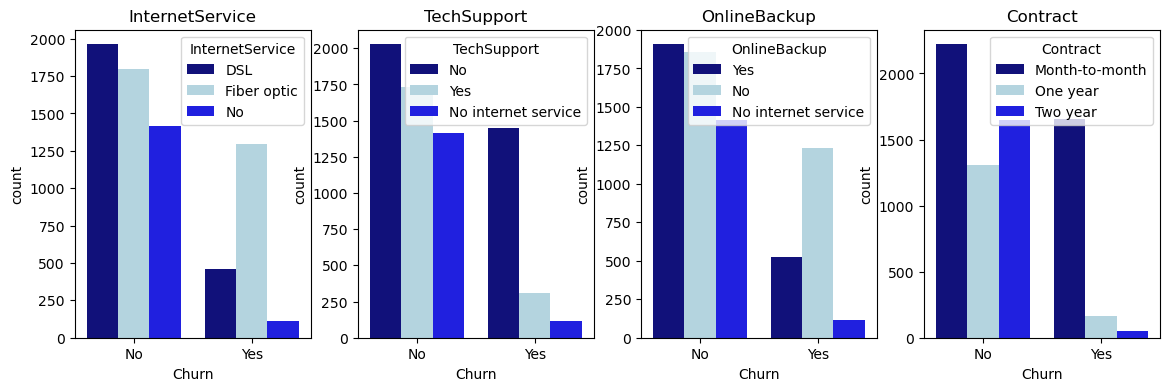

In [17]:
# Comparing Churn with other variables like Internetservice,Techsupport,Onnlinebackup and contrcats 

colors = ['darkblue', 'lightblue', 'blue']

cols = ['InternetService', 'TechSupport', 'OnlineBackup', 'Contract']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue=str(col), data=df, palette=colors)
    ax.set_title(f"{col}")

The analysis identifies key factors contributing to customer churn:

1.InternetService: Customers using fiber optic Internet are more likely to churn, possibly due to high costs or inadequate coverage.

2.TechSupport: Many churned users didn't utilize tech support, suggesting unresolved technical issues as a churn driver.

3.OnlineBackup: Churned customers often lacked online backup services, indicating a need for better data protection measures.

4.Contract Type: Churn was prevalent among users on monthly contracts, likely due to the ease of cancellation.

Data-driven insights are crucial for understanding churn patterns. Addressing issues such as the lack of tech support can inform targeted retention strategies, like offering complimentary support services. Ultimately, businesses must proactively tackle churn to enhance customer satisfaction and long-term profitability. 

# Multivariate analysis

# 1. Contract and Billing Variables Against Churn

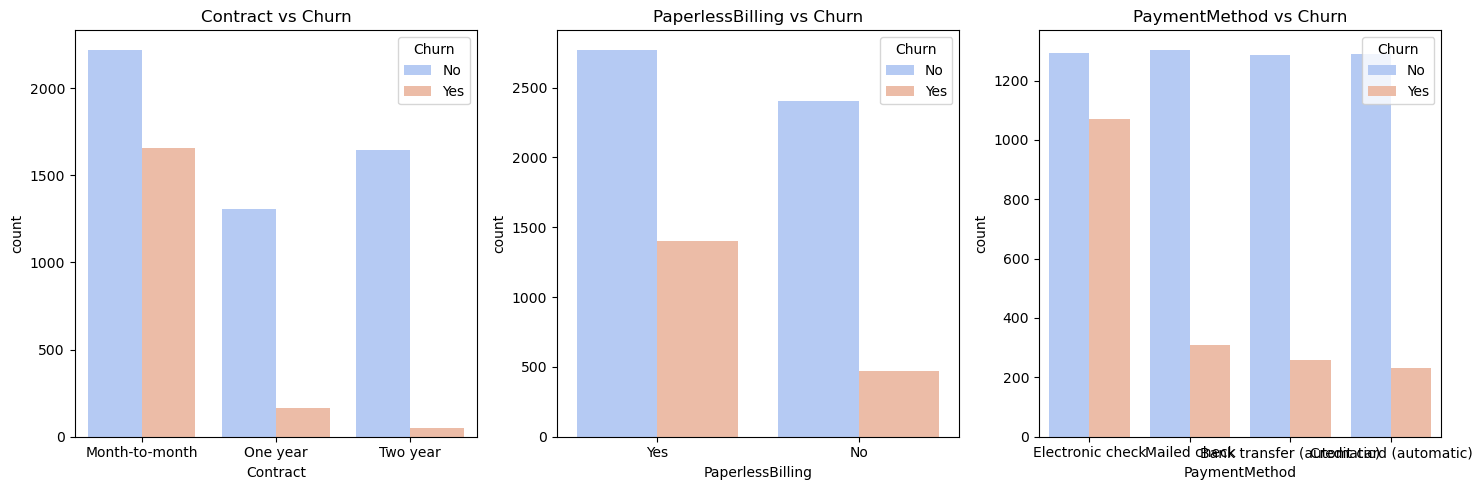

Cross-tabulations between Contract, PaperlessBilling, PaymentMethod, and Churn:
Churn                                                       No  Yes
Contract       PaperlessBilling PaymentMethod                      
Month-to-month No               Bank transfer (automatic)  151   55
                                Credit card (automatic)    116   45
                                Electronic check           265  188
                                Mailed check               351  118
               Yes              Bank transfer (automatic)  237  146
                                Credit card (automatic)    249  133
                                Electronic check           591  806
                                Mailed check               260  164
One year       No               Bank transfer (automatic)  160   11
                                Credit card (automatic)    161   13
                                Electronic check           100   14
                                Mail

In [18]:
# Selecting relevant columns for analysis against Churn
selected_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
data = df[selected_cols]

# Multivariate analysis: Count plots
plt.figure(figsize=(15, 5))

# Plotting Contract vs Churn
plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=data, palette='coolwarm')
plt.title('Contract vs Churn')

# Plotting PaperlessBilling vs Churn
plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=data, palette='coolwarm')
plt.title('PaperlessBilling vs Churn')

# Plotting PaymentMethod vs Churn
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='coolwarm')
plt.title('PaymentMethod vs Churn')

plt.tight_layout()
plt.show()

# Multivariate analysis: Cross-tabulations
# Creating cross-tabulations between Contract, PaperlessBilling, PaymentMethod, and Churn
cross_tabs = pd.crosstab(index=[data['Contract'], data['PaperlessBilling'], data['PaymentMethod']], columns=data['Churn'])

# Displaying the cross-tabulations
print("Cross-tabulations between Contract, PaperlessBilling, PaymentMethod, and Churn:")
print(cross_tabs)


# 2.Service Usage and Satisfaction Variables Churn



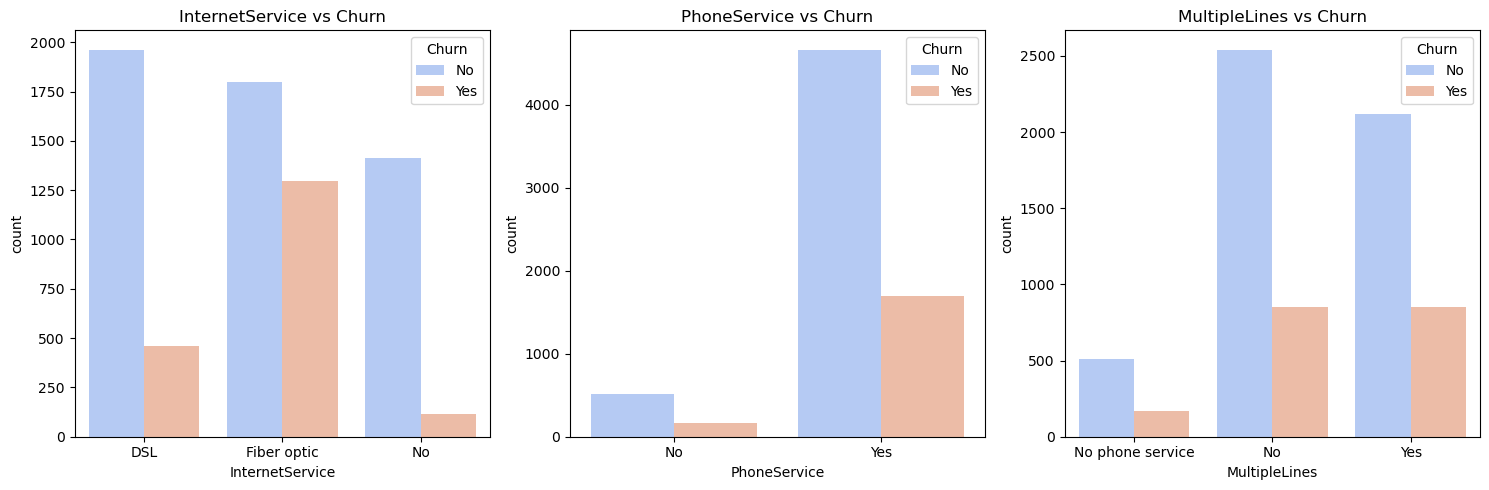

Cross-tabulations between InternetService, PhoneService, MultipleLines, and Churn:
Churn                                            No  Yes
InternetService PhoneService MultipleLines              
DSL             No           No phone service   512  170
                Yes          No                 832  216
                             Yes                618   73
Fiber optic     Yes          No                 628  530
                             Yes               1171  767
No              Yes          No                1081  103
                             Yes                332   10


In [19]:
# Selecting relevant columns for analysis against Churn
selected_cols = ['InternetService', 'PhoneService', 'MultipleLines', 'Churn']
data = df[selected_cols]

# Multivariate analysis: Count plots
plt.figure(figsize=(15, 5))

# Plotting InternetService vs Churn
plt.subplot(1, 3, 1)
sns.countplot(x='InternetService', hue='Churn', data=data, palette='coolwarm')
plt.title('InternetService vs Churn')

# Plotting PhoneService vs Churn
plt.subplot(1, 3, 2)
sns.countplot(x='PhoneService', hue='Churn', data=data, palette='coolwarm')
plt.title('PhoneService vs Churn')

# Plotting MultipleLines vs Churn
plt.subplot(1, 3, 3)
sns.countplot(x='MultipleLines', hue='Churn', data=data, palette='coolwarm')
plt.title('MultipleLines vs Churn')

plt.tight_layout()
plt.show()

# Multivariate analysis: Cross-tabulations
# Creating cross-tabulations between InternetService, PhoneService, MultipleLines, and Churn
cross_tabs = pd.crosstab(index=[data['InternetService'], data['PhoneService'], data['MultipleLines']], columns=data['Churn'])

# Displaying the cross-tabulations
print("Cross-tabulations between InternetService, PhoneService, MultipleLines, and Churn:")
print(cross_tabs)

# 3. Demographic Variables (gender and SeniorCitizen) vs. Churn

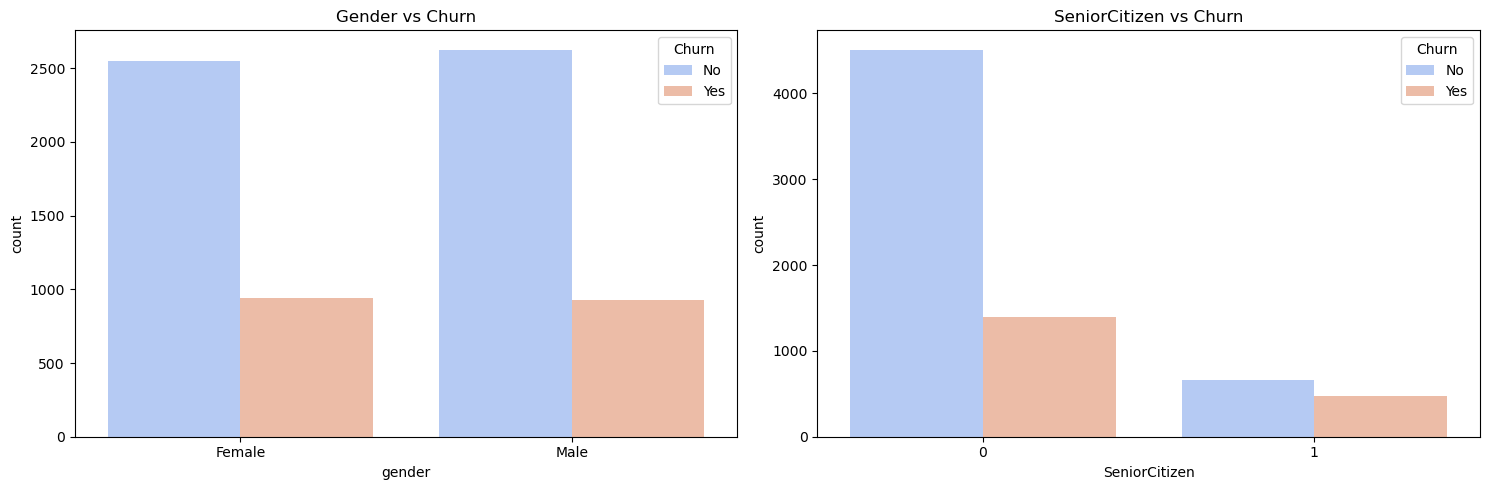

Cross-tabulations between gender, SeniorCitizen, OnlineSecurity, TechSupport, and Churn:
Churn                                                          No  Yes
gender SeniorCitizen OnlineSecurity      TechSupport                  
Female 0             No                  No                   489  436
                                         Yes                  307   84
                     No internet service No internet service  673   53
                     Yes                 No                   306   77
                                         Yes                  446   49
       1             No                  No                   149  180
                                         Yes                   48   21
                     No internet service No internet service   18    3
                     Yes                 No                    52   25
                                         Yes                   61   11
Male   0             No                  No                

In [20]:
# Selecting relevant columns for analysis against Churn
selected_cols = ['gender', 'SeniorCitizen', 'OnlineSecurity', 'TechSupport', 'Churn']
data = df[selected_cols]

# Multivariate analysis: Count plots
plt.figure(figsize=(15, 5))

# Plotting gender vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='Churn', data=data, palette='coolwarm')
plt.title('Gender vs Churn')

# Plotting SeniorCitizen vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='coolwarm')
plt.title('SeniorCitizen vs Churn')

plt.tight_layout()
plt.show()

# Multivariate analysis: Cross-tabulations
# Creating cross-tabulations between gender, SeniorCitizen, OnlineSecurity, TechSupport, and Churn
cross_tabs = pd.crosstab(index=[data['gender'], data['SeniorCitizen'], data['OnlineSecurity'], data['TechSupport']], columns=data['Churn'])

# Displaying the cross-tabulations
print("Cross-tabulations between gender, SeniorCitizen, OnlineSecurity, TechSupport, and Churn:")
print(cross_tabs)

# 4.Financial Variables Vs Churn

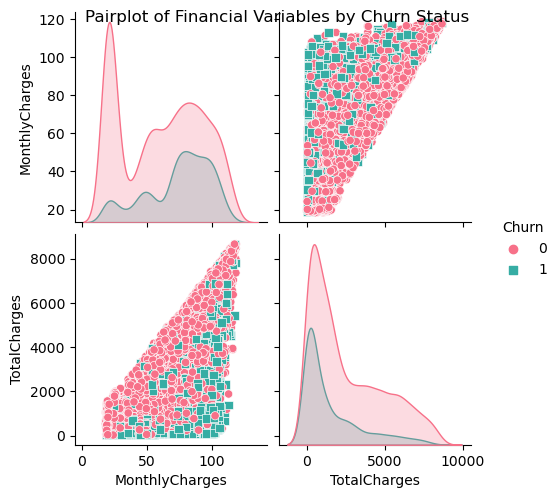

In [29]:

# Selecting variables for financial-Variables-Vs-Churn analysis
financial_vars = ['MonthlyCharges', 'TotalCharges', 'Churn']
df_financial = df[financial_vars]

# Convert 'Churn' variable to numeric for plotting (1 for 'Yes', 0 for 'No')
df_financial['Churn'] = df_financial['Churn'].map({'Yes': 1, 'No': 0})

# Create a scatterplot matrix
sns.pairplot(df_financial, hue='Churn', palette='husl', markers=['o', 's'])
plt.suptitle('Pairplot of Financial Variables by Churn Status')
plt.show()

# Encoding Categorical Variables




In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as np

# Perform one-hot encoding for categorical variables
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Create new features
# Example: Creating a new feature indicating the total number of services subscribed to
df_encoded['TotalServices'] = df['InternetService'] + df['PhoneService'] + df['MultipleLines']  # Combine relevant service subscription variables

print(df_encoded.head())

   customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ... Churn  \
0  No phone service             No          Yes               No  ...    No   
1                No            Yes           No              Yes  ...    No   
2                No            Yes          Yes               No  ...   Yes   
3  No phone service            Yes           No              Yes  ...    No   
4                No             No           No               No  ...   Yes   

  gender_Male InternetService_Fiber optic InternetService_No  \
0       False               

In [23]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [24]:
#Running the below code will make all the categorical values in the dataset to numbers

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [25]:
# Merging the dataframe with the previous one we created.

num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

# Building the Customer Churn Prediction Model



In [26]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

# Customer Churn Prediction Model Evaluation
Evaluation of the model predictions on the test dataset

In [28]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7871607065919862


# Our model is performing well, with an accuracy of approximately 0.78 on the test dataset.